Deep Learning Models using Job Descriptions Text Data and Other Inputs

## Import Libraries

In [1]:
import time
import nltk
from nltk.corpus import stopwords

#NLP
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

#Model Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

#Machine Learning
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from pprint import pprint
from time import time
import logging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
np.random.seed(0)

In [1]:
!pip install flask

### Salary Prediction

In [43]:
def tdidf(text):
    tdidf = TfidfVectorizer(sublinear_tf = True, min_df=0.01, max_df=0.5, ngram_range=(1,3), stop_words='english')
    fitted_vectorizer = tdidf.fit(text)
    tfidf_vectorizer_vectors = fitted_vectorizer.transform(text)
    return tfidf_vectorizer_vectors
    
def classifier(job):
    model = SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=3).fit(tfidf_vectorizer_vectors, y_train)
    return model

In [20]:
#final model: finalzed_model.sav

In [25]:
df = pd.read_csv("salary_final_2.csv")

In [26]:
#Categorical target
target_class = df['Salary_Bins'].astype('category')

In [27]:
text = df['combined_text']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(text, target_class, test_size=0.1, random_state=4)

In [6]:
#This works for individual job description, but how to save the model? 
tdidf = TfidfVectorizer(sublinear_tf = True, min_df=0.01, max_df=0.5, ngram_range=(1,3), stop_words='english')
fitted_vectorizer = tdidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=3).fit(tfidf_vectorizer_vectors, y_train)

In [29]:
#save the vectorizer to disk

pickle.dump(fitted_vectorizer, open("fitted_vectorizer.pickle", "wb"))

In [31]:
#save the model to disk

filename='finalized_model_2.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
tfidf_vectorizer = pickle.load(open('fitted_vectorizer.pickle','rb'))
result = loaded_model.predict(tfidf_vectorizer.transform([job]))


array([5])

In [ ]:
labels=['Below 50,000','50,000-70,000','70,000-90,000','90,000-120,000','120,000-150,000','150,000 and Above']

In [34]:
labels[result[0]]

'150,000 and Above'

In [7]:
job = """We are building the next billion-dollar business in enterprise SAAS. We have an amazing founding team, with experts in product, engineering, data science, and machine learning, and we just launched our MVP. We are now searching for a data scientist that will own the core data science work, build NLP applications, and generate insights.

After we ingest PDFs from clients, we perform OCR, extract the text using text classification models, validate the extraction with a human in the loop, and then map all the data into our canonical taxonomy.

Once the data is mapped to our taxonomy, we have a clean digital invoice-based data asset. We generate insights using this data asset, surfacing line-item level insights to our clients via our web app.

Your role will be critical to generating this intelligence for our clients.

Here are some of the major items you will own at Glean:

Data science code to clean and prepare the data extracted from invoices, including handling nulls, addressing exceptions, imputing data (when possible), and enriching data using third-party APIs
Data science code to validate the goodness of extractions performed by the ML models + human in the loop
Collaborate with vendors to perform OCR and text classification
Develop NLP models to map the extracted data to our canonical taxonomy of vendors and line items (e.g., using word embeddings, etc.) at scale
Once the data has been mapped to the canonical taxonomy, perform feature engineering, generate insights, detect anomalies, and surface the intelligence in a digestible format to the end user
You will work closely with the data engineers to productionize the data science and machine learning code that is developed, and you will work closely with the engineering team to make sure the data science and machine learning pipelines are performant in production.

You’ll be accountable for Glean’s:

Data science vision – ownership over and definition of the data science pipeline, working closely with the executive team, and acting as a thought leader across the company
Technical execution – define, articulate, and execute the data science strategy from launch to scale, managing the day-to-day execution, and implementing best practices
Fast prototyping culture – Develop data science and machine learning applications fast, prototyping quickly to solve thorny business problems without getting bogged down in theory (ship early and often)
Getting your hands dirty - we’re a small team and we have a lot of work ahead of us. You should be excited to roll up your sleeves and help the team in any way you can
Build, build, build – jumping in and writing data science code, from architecture to fixing bugs, delivering NLP and insights within the three months of hire. We'll rely on you and your team to handle day-to-day execution including:
Cleaning the extracted data, validating the accuracy of the extraction, and addressing issues as they occur
Shipping NLP applications to perform mapping of extracted data at scale
Developing and deploying models using PyTorch or TensorFlow
Writing code using PySpark
Performing feature engineering on the cleansed and mapped data
Generating insights and narratives
Performing anomaly detection to surface what the client needs to know fast
Wrangling, standardizing, enhancing, implementing, and monitoring data repositories
Creating workflows to ingest, enrich, and make data available across the Glean platform
"""

In [12]:
a = model.predict(fitted_vectorizer.transform([job]))

In [19]:
labels=['Below 50,000','50,000-70,000','70,000-90,000','90,000-115,000','115,000-150,000','150,000 and Above']

#BINS = [0,50000,70000,90000,115000,150000,400000]

In [20]:
labels[a[0]]

'150,000 and Above'

### Word Cloud

In [21]:
!pip install wordcloud

In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

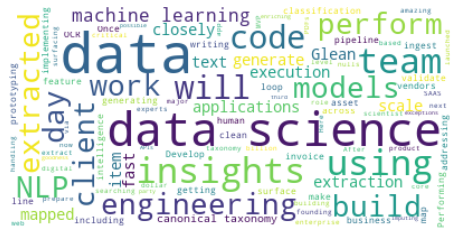

In [24]:


#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["to","sex","may","Ability to","Full time","Experience with", "Job Type"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(job)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
SGD = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,3), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(alpha=0.0001, max_iter=500, n_jobs=3))
])

In [84]:
SGD.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=0.01,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabu...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                     

In [85]:
y_pred = SGD.predict(X_test)

Confusion Matrix

In [79]:
confusion_matrix(y_test, y_pred)

array([[ 9,  2,  0,  1,  0,  0],
       [ 1, 13,  3,  0,  0,  0],
       [ 1,  3,  8,  1,  0,  0],
       [ 0,  1,  2, 14,  1,  0],
       [ 0,  1,  1,  3, 11,  0],
       [ 1,  2,  0,  2,  5, 11]])

In [86]:
#Mean accuracy on the given test data and labels
SGD.score(X_test, y_test)

0.6907216494845361

In [17]:
#salary_predictor.py 

#Clean single job description
def clean_word(jd):
    
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','covid','non','pm','am','eg','e','g','ie','i']
    
    jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
    jd_tokens=[word.lower() for word in jd_tokens_raw]
    cleaned_text = [word for word in jd_tokens if word not in stopwords_list]
    

    return cleaned_text # Turn to words to use in count vectorizer 
